In [88]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pyart.graph.cm as pcm
from netCDF4 import num2date,date2num,Dataset
import scipy,matplotlib
import pyart
import time
import copy
%matplotlib inline

# Testing LP phase processing with Houston TX NEXRAD data

## Changes from test_proclp_grid_nexrad_2
This is copied from test_proclp_grid_nexrad_2 to do further tests to ensure that the LP processing is doing a good job and also maybe maybe maybe to compare to other methods of processing KDP. 

Specifically, I would like to address certain obvious defects observed in the KDP processing. We can maybe do that with pyart.graph.RadarDisplay(xsect).

In [282]:
#filenm  = 'KVNX20110520_102747_V06'
#filenm = 'KVNX20110520_103207_V06'
#filenm = '/mnt/raid/mvanlier/nexrad_khgx/20130608/KHGX20130608_150236_V06'
filenm = '/mnt/raid/mvanlier/nexrad_khgx/20130608/KHGX20130608_165255_V06'   #..obj 1
#filenm = '/mnt/raid/mvanlier/nexrad_khgx/20130608/KHGX20130608_173151_V06'   #..obj 6
#filenm = '/mnt/raid/mvanlier/nexrad_khgx/20130608/KHGX20130608_174907_V06'   #..obj 7

#filenm = '/mnt/raid/mvanlier/nexrad_khgx/20130608/KHGX20130608_193925_V06'
radarob = pyart.io.read_nexrad_archive(filenm)
#radarob = pyart.io.nexrad_archive.read_nexrad_new(filenm)     #..For environment nexrad_new1

In [283]:
nswp = radarob.nsweeps
swp_arr = range(nswp)
swp_arr.remove(1)
swp_arr.remove(3)
swp_arr.remove(5)
print swp_arr

[0, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [284]:
radarnew = radarob.extract_sweeps(swp_arr)
print radarnew.fixed_angle
print radarob.fixed_angle
#print radarob.info()

{'units': 'degrees', 'long_name': 'Target angle for sweep', 'standard_name': 'target_fixed_angle', 'data': array([  0.48339844,   0.87890625,   1.31835938,   1.80175781,
         2.41699219,   3.12011719,   3.99902344,   5.09765625,
         6.41601562,   7.99804688,  10.01953125,  12.48046875,
        15.60058594,  19.51171875], dtype=float32)}
{'units': 'degrees', 'long_name': 'Target angle for sweep', 'standard_name': 'target_fixed_angle', 'data': array([  0.48339844,   0.48339844,   0.87890625,   0.87890625,
         1.31835938,   1.31835938,   1.80175781,   2.41699219,
         3.12011719,   3.99902344,   5.09765625,   6.41601562,
         7.99804688,  10.01953125,  12.48046875,  15.60058594,  19.51171875], dtype=float32)}


## Note:
I tested out various values of coef, which (correct me if I'm wrong Scott G.) controls something about how the LP method uses reflectivity in correcting diff phase. I was rather surprised at how strongly it controlled peak values of KDP...

In [285]:
#coh_pwr = copy.deepcopy(radarnew.fields['differential_phase'])
coh_pwr = copy.deepcopy(radarnew.fields['differential_phase'])
#coh_pwr = copy.deepcopy(radarob.fields['PHI'])
coh_pwr['data'] = coh_pwr['data']*0.+1.
radarnew.fields['norm_coherent_power'] = coh_pwr
#print radarob.fields

#phidp,kdp = pyart.correct.phase_proc_lp(radarnew,0.0,refl_field='reflectivity',
phidp,kdp = pyart.correct.phase_proc_lp(radarnew,0.0,refl_field='reflectivity',
                                        ncp_field='norm_coherent_power',
                                        rhv_field='cross_correlation_ratio',
                                        phidp_field='differential_phase',
#                                        LP_solver='cylp_mp',proc=15,coef=0.98,      #...Test high
#                                        LP_solver='cylp_mp',proc=15,coef=0.5,      #...Test low ... BAD!
                                        LP_solver='cylp_mp',proc=10,coef=0.87,      #...Default
                                        low_z=30.,fzl=13000.)
#                                         LP_solver='cylp')
#phidp,kdp = pyart.correct.phase_proc_lp(radarob,0.0,refl_field='REF',
#            ncp_field='norm_coherent_power',rhv_field='RHO',phidp_field='PHI')
radarnew.fields['phidp'] = phidp
radarnew.fields['kdp']=kdp
#radarnew.fields['phidp'] = phidp
#radarnew.fields['kdp']=kdp

Calculating with 10 processes, 72 rays per chunk
Calculating with 10 processes, 72 rays per chunk
Calculating with 10 processes, 72 rays per chunk
Calculating with 10 processes, 36 rays per chunk
Calculating with 10 processes, 36 rays per chunk
Calculating with 10 processes, 36 rays per chunk
Calculating with 10 processes, 36 rays per chunk
Calculating with 10 processes, 36 rays per chunk
Calculating with 10 processes, 36 rays per chunk
Calculating with 10 processes, 36 rays per chunk
Calculating with 10 processes, 36 rays per chunk
Calculating with 10 processes, 36 rays per chunk
Calculating with 10 processes, 36 rays per chunk
Calculating with 10 processes, 36 rays per chunk


In [286]:
print radarnew.nrays
print '#.....'

print radarnew.extract_sweeps([0]).nrays
print radarnew.extract_sweeps([1]).nrays
print radarnew.extract_sweeps([2]).nrays
print '#.....'
print radarnew.extract_sweeps([3]).nrays
print radarnew.extract_sweeps([4]).nrays
print radarnew.extract_sweeps([5]).nrays
print radarnew.extract_sweeps([6]).nrays
print radarnew.extract_sweeps([7]).nrays
print radarnew.extract_sweeps([8]).nrays
print radarnew.extract_sweeps([9]).nrays
print radarnew.extract_sweeps([10]).nrays
print radarnew.extract_sweeps([11]).nrays
print radarnew.extract_sweeps([12]).nrays
print radarnew.extract_sweeps([13]).nrays
# print radarnew.extract_sweeps([14]).nrays
# print radarnew.extract_sweeps([15]).nrays
# print radarnew.extract_sweeps([16]).nrays
#..

6120
#.....
720
720
720
#.....
360
360
360
360
360
360
360
360
360
360
360


## Plot offending data
Anomalously high values of KDP are calculated every once in a while -- visible here in the 5 degree elevation, 238 degree azimuth ray. 

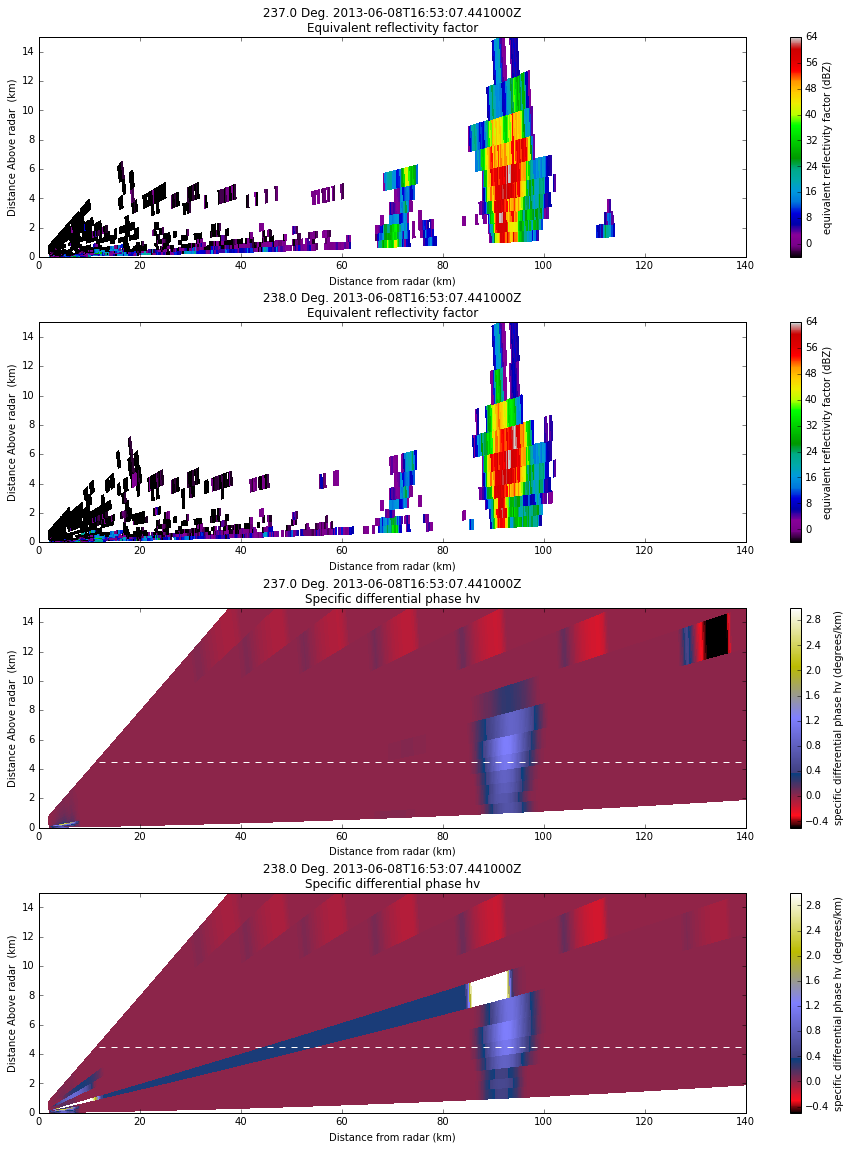

In [287]:
xsect = pyart.util.cross_section_ppi(radarnew, [237, 238])   #... 1
#xsect = pyart.util.cross_section_ppi(radarnew, [236, 237])   #... 6
#xsect = pyart.util.cross_section_ppi(radarnew, [175, 176])  #... 7

maxx = 140

display = pyart.graph.RadarDisplay(xsect)
fig = plt.figure(figsize=(13,16))
ax = fig.add_subplot(411)
display.plot('reflectivity', 0, vmin=-4, vmax=64.,cmap=cm.spectral)
ax.set_ylim(0.,15)
ax.set_xlim(0.,maxx)
ax = fig.add_subplot(412)
display.plot('reflectivity', 1, vmin=-4, vmax=64.,cmap=cm.spectral)
ax.set_ylim(0.,15)
ax.set_xlim(0.,maxx)

ax = fig.add_subplot(413)
display.plot('kdp', 0, vmin=-.5, vmax=3.,cmap=cm.gist_stern)
ax.plot([0.,maxx],[frz_lev,frz_lev],'w--')
ax.set_ylim(0.,15)
ax.set_xlim(0.,maxx)
ax = fig.add_subplot(414)
display.plot('kdp', 1, vmin=-.5, vmax=3.,cmap=cm.gist_stern)
ax.plot([0.,maxx],[frz_lev,frz_lev],'w--')
ax.set_ylim(0.,15)
ax.set_xlim(0.,maxx)

plt.tight_layout()
plt.show()

#fig.savefig('kdp_proc_fail.png')

## Taking a closer look into issues with this ray

In [288]:
radarnew.add_field_like('reflectivity', 'scaled_reflectivity',
                    radarnew.fields['reflectivity']['data']/10.)

5.05371


(0.0, 20.0)

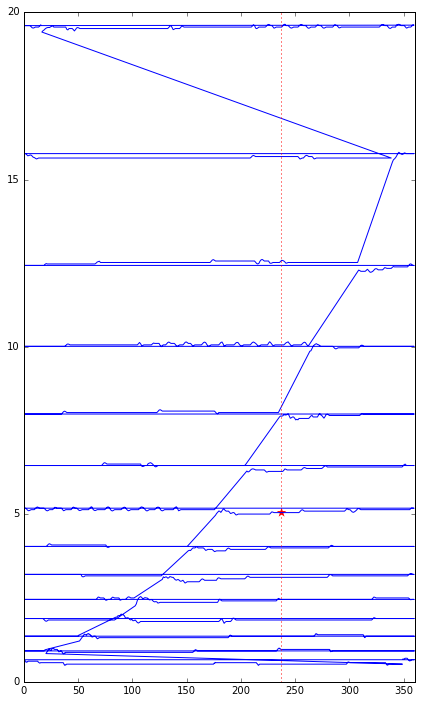

In [293]:
az = 237
#az = 175
#ray_num = 2960
ray_num = 3661

print radarnew.elevation['data'][ray_num]
fig = plt.figure(figsize=(7,12))
#plt.hist(radarnew.azimuth['data'])
ax = fig.add_subplot(111)
ax.plot(radarnew.azimuth['data'],radarnew.elevation['data'])
ax.scatter(radarnew.azimuth['data'][ray_num],radarnew.elevation['data'][ray_num],c='r',
            edgecolor='none',marker='*',s=100)
ax.plot([az,az],[0,20],'r:')
ax.set_xlim(0,360.)
ax.set_ylim(0.,20.)

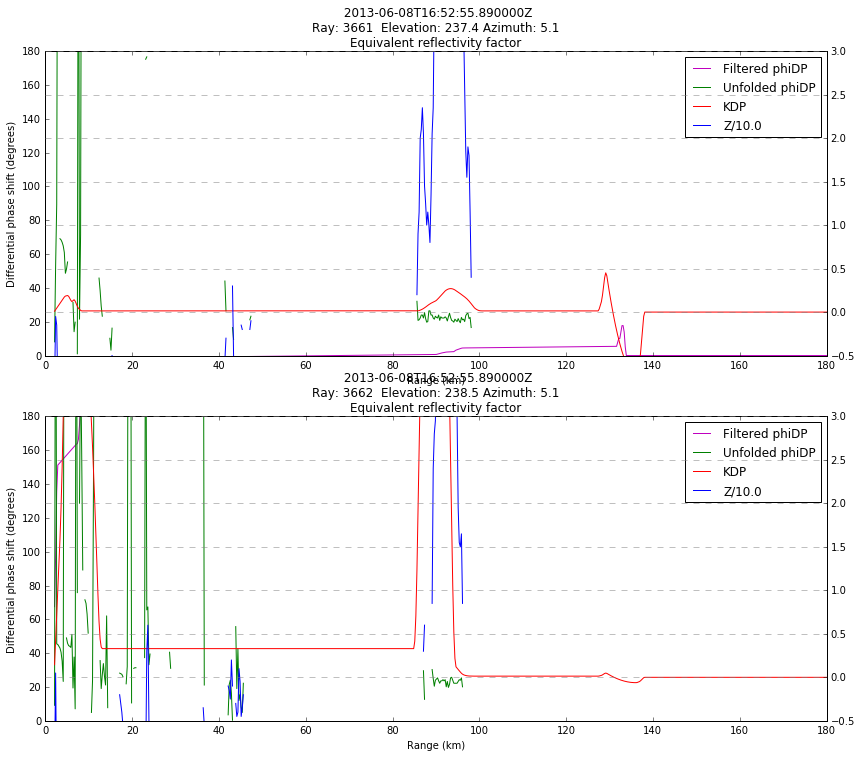

In [294]:
az = 50
n720 = 3
n360 = 1

maxx = 180

display = pyart.graph.RadarDisplay(radarnew)
fig = plt.figure(figsize=[14, 12])
ax = fig.add_subplot(211)
#ray_num = n720*720 + n360*360 + az
#ray_num = 3992
ray_num = 3661
#ray_num = 3780
#ray_num = 2960

# filtered phidp and unfolded phidp
display.plot_ray('phidp', ray_num, format_str='m-',
                 axislabels_flag=False, title_flag=False, ax=ax)

display.plot_ray('differential_phase', ray_num, format_str='g-',
                 axislabels_flag=False, title_flag=False, ax=ax)

# set labels
ax.set_ylim(0, 180)
ax.set_xlim(0,maxx)
ax.set_ylabel('Differential phase shift (degrees)')
ax.set_xlabel('Range (km)')

# plot KDP and reflectivity on second axis
ax2 = ax.twinx()
display.plot_ray('kdp', ray_num, format_str='r-',
                 axislabels_flag=False, title_flag=False, ax=ax2)

display.plot_ray('scaled_reflectivity', ray_num, format_str='b-',
                 axislabels_flag=False, title_flag=True, ax=ax2)

# decorate
ax2.yaxis.grid(color='gray', linestyle='dashed')
ax2.set_xlim(0,maxx)
ax2.set_ylim(-.5,3.)
ax.legend(display.plots,
          ["Filtered phiDP", "Unfolded phiDP", 'KDP', 'Z/10.0'],
          loc='upper right')


ax = fig.add_subplot(212)
#ray_num = n720*720 + n360*360 + az + 1
ray_num += 1

# filtered phidp and unfolded phidp
display.plot_ray('phidp', ray_num, format_str='m-',
                 axislabels_flag=False, title_flag=False, ax=ax)

display.plot_ray('differential_phase', ray_num, format_str='g-',
                 axislabels_flag=False, title_flag=False, ax=ax)

# set labels
ax.set_ylim(0, 180)
ax.set_xlim(0,maxx)
ax.set_ylabel('Differential phase shift (degrees)')
ax.set_xlabel('Range (km)')

# plot KDP and reflectivity on second axis
ax2 = ax.twinx()
display.plot_ray('kdp', ray_num, format_str='r-',
                 axislabels_flag=False, title_flag=False, ax=ax2)
display.plot_ray('scaled_reflectivity', ray_num, format_str='b-',
                 axislabels_flag=False, title_flag=True, ax=ax2)
ax2.set_xlim(0,maxx)
ax2.set_ylim(-.5,3.)

# decorate
ax2.yaxis.grid(color='gray', linestyle='dashed')
ax.legend(display.plots,
          ["Filtered phiDP", "Unfolded phiDP", 'KDP', 'Z/10.0'],
          loc='upper right')


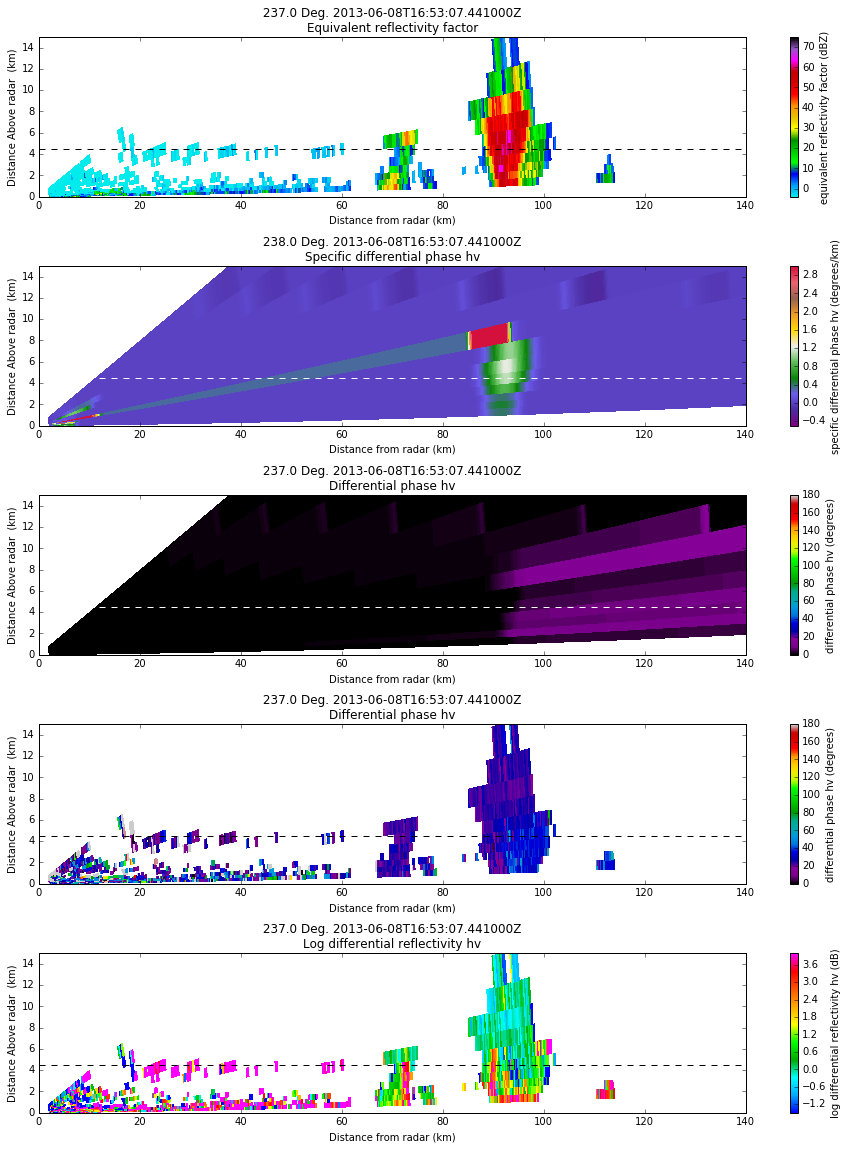

In [295]:
maxx = 140

display = pyart.graph.RadarDisplay(xsect)
fig = plt.figure(figsize=(13,16))
ax = fig.add_subplot(511)
display.plot('reflectivity', 0, vmin=-4, vmax=75.,cmap=pcm.NWSRef)
ax.plot([0.,maxx],[frz_lev,frz_lev],'k--')
ax.set_ylim(0.,15)
ax.set_xlim(0.,maxx)
ax = fig.add_subplot(512)
display.plot('kdp', 1, vmin=-.5, vmax=3.,cmap=pcm.RRate11)
ax.plot([0.,maxx],[frz_lev,frz_lev],'w--')
ax.set_ylim(0.,15)
ax.set_xlim(0.,maxx)

ax = fig.add_subplot(513)
display.plot('phidp', 0, vmin=-.5, vmax=180.,cmap=cm.spectral)
#display.plot('phidp', 1, cmap=cm.spectral)
ax.plot([0.,maxx],[frz_lev,frz_lev],'w--')
ax.set_ylim(0.,15)
ax.set_xlim(0.,maxx)
ax = fig.add_subplot(514)
display.plot('differential_phase', 0, vmin=-.5, vmax=180.,cmap=cm.spectral)
#display.plot('differential_phase', 1, cmap=cm.spectral)
#display.plot('differential_reflectivity', 1, vmin=-1.5,vmax=5.,cmap=pcm.RefDiff)
ax.plot([0.,maxx],[frz_lev,frz_lev],'k--')
ax.set_ylim(0.,15)
ax.set_xlim(0.,maxx)

ax = fig.add_subplot(515)
#display.plot('differential_phase', 0, vmin=-.5, vmax=180.,cmap=cm.spectral)
#display.plot('differential_phase', 1, cmap=cm.spectral)
display.plot('differential_reflectivity', 0, vmin=-1.5,vmax=4.,cmap=pcm.RefDiff)
ax.plot([0.,maxx],[frz_lev,frz_lev],'k--')
ax.set_ylim(0.,15)
ax.set_xlim(0.,maxx)

plt.tight_layout()
plt.show()

#..fig.savefig('kdp_proc_fail.png')
#..

## Final note:
I'm not sure why this particular ray fails so badly, or any solutions for how to fix it. What I am surprised by is the quality of the raw differential phase from the NEXRAD data. I'm also surprised that, for the failing ray, KDP is allowed to be so high very close to the radar, where reflectivity is very low. I thought the LP method corrected for that, but perhaps I need to read Scott's paper again. 